# Agentic Search 🔍

## Introduction
This Jupyter Notebook demonstrates the use of the `langchain library and its associated tools to perform searches and extract information`. The primary focus is on utilizing the `TavilySearchResults tool` to fetch search results and process them effectively. Additionally, the notebook includes examples of web scraping using the requests and BeautifulSoup libraries.

### Import Required Libraries

In [1]:
# Import necessary modules from the langchain library
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage
from langchain.chat_models import ChatOpenAI  # Correct import
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated
import operator

### Load Environment Variables
Load the environment variables from a .env file to access the OpenAI API key.

In [3]:
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Print the API key to verify it is loaded correctly
print(f"TAVILY_API_KEY: {os.getenv('TAVILY_API_KEY')}")

TAVILY_API_KEY: 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


In [4]:
# Initialize TavilySearchResults tool
tool = TavilySearchResults(max_results=4) #increased number of results
print(type(tool))
print(tool.name)

<class 'langchain_community.tools.tavily_search.tool.TavilySearchResults'>
tavily_search_results_json


The original Notebook was using the `TavilyClient` with a `search method`, see the following snippet code.
```
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY")) 

# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]

```

However, instead to use the `TavilyClient`, let's use `TavilySearchResults` class from the `langchain_community.tools.tavily_search` module. Therefore, we need also to take into consideration that the `TaviliSearchResults` class does not have a `search`method. Let's explare the attubutes and methods that this class can offer instead of `search'

### Connecting to Tavily Client

In [5]:
# libraries
#from dotenv import load_dotenv
#import os
#from langchain_community.tools.tavily_search import TavilySearchResults

# load environment variables from .env file
#_ = load_dotenv()

# Connect to Tavily using environment variables from .env file
client = TavilySearchResults(api_key=os.environ.get("TAVILY_API_KEY"))

In [6]:
# Inspect the TavilySearchResults class
print(dir(client))

['InputType', 'OutputType', '__abstractmethods__', '__annotations__', '__call__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__orig_bases__', '__parameters__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_validator__', '__reduce__', '__

**Explanation output** Is seems like that  `the TavilySearchResults` class has a `run` method which might be used to perform the `search`. 

### Example search 

In [7]:
# libraries
#from dotenv import load_dotenv
#import os
#from langchain_community.tools.tavily_search import TavilySearchResults

# load environment variables from .env file
#_ = load_dotenv()

# connect
#client = TavilySearchResults(api_key=os.environ.get("TAVILY_API_KEY"))

# run search
result = client.run("What is in Nvidia's new Blackwell GPU?", include_answer=True)

# print the answer
print(result["answer"])

TypeError: list indices must be integers or slices, not str

**Explanation output** The run method likely return a list and not a  dictionary. Let's inspect the result and print it to understand its structure. 

In [7]:
# libraries
#from dotenv import load_dotenv
#import os
#from langchain_community.tools.tavily_search import TavilySearchResults

# load environment variables from .env file
#_ = load_dotenv()

# connect
#client = TavilySearchResults(api_key=os.environ.get("TAVILY_API_KEY"))

# Example: Run a search query and inspect the results
result = client.run("What is in Nvidia's new Blackwell GPU?", include_answer=True)

# Print the result to understand its structure
print(result)

[{'url': 'https://blog.neevcloud.com/nvidias-blackwell-gpus-a-deep-dive-into-b100-b200-and-gb200', 'content': 'With the B100, B200, and GB200 GPUs, NVIDIA has set new benchmarks for AI performance, data processing efficiency, and scalability. This blog explores the features, applications, and benefits of the NVIDIA Blackwell GPUs, focusing on their role in advancing AI and datacenter performance. The NVIDIA B100 GPU is the flagship of the Blackwell series, designed to handle the most demanding AI training workloads. Their advanced features cater to the growing demand for scalable, efficient, and powerful cloud-based GPU solutions, making them integral to the future of AI datacenters. Whether you’re deploying massive AI training models with the B100, balancing diverse workloads with the B200, or delivering real-time inference with the GB200, these GPUs redefine performance for AI datacenters and cloud-based GPU platforms.'}, {'url': 'https://nvidianews.nvidia.com/news/nvidia-blackwell-p

**Explanation output** The result is a list of dictionaries, each containing url and content keys. To extract and pront the answer, it is possible to iterate over the list and access the content key of each dictionary. 

In [8]:
# libraries
#from dotenv import load_dotenv
#import os
#from langchain_community.tools.tavily_search import TavilySearchResults

# load environment variables from .env file
#_ = load_dotenv()

# connect
#client = TavilySearchResults(api_key=os.environ.get("TAVILY_API_KEY"))

# run search
result = client.run("What is in Nvidia's new Blackwell GPU?", include_answer=True)

# Extract and print the content from the search results
for item in result:
    print(item['content'])

NVIDIA's Blackwell GPU architecture revolutionizes AI with unparalleled performance, scalability and efficiency. Anchored by the Grace Blackwell GB200 superchip and GB200 NVL72, it boasts 30X more performance and 25X more energy efficiency over its predecessor.
Nvidia Blackwell architecture deep dive: A closer look at the upgrades coming with RTX 50-series GPUs | Tom's Hardware Nvidia Blackwell architecture deep dive: A closer look at the upgrades coming with RTX 50-series GPUs The new Nvidia Blackwell GPU architecture will power the upcoming generation of RTX 50-series GPUs. We've known various details for a while now, and many have been rumored, but at its Editors' Day during CES 2025, Nvidia provided a lot more information and details on the core functionality. Nvidia Blackwell RTX 50-series Founders Edition graphics cards — Details on the new design, cooling, and features of the reference models Nvidia neural rendering deep dive — Full details on DLSS 4, Reflex 2, mega geometry, an

## Regular search

In [9]:
# Define a query for regular search
city = "San Francisco"  # choose location (try to change to your own city!)

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

**Note** To be able to proceed, it is required to install the `duckduckgo_search library`.  
- The `duckduckgo_search library`is a Python library that allows you to perform web searches using the DuckDuckGo search engine programmatically. It provides a simple API for querying DuckDuckGo and retrieving search results, including links, titles, and snippets of information, without tracking or storing user data.
-  This can be installed through the terminal with the commannd 
```py
py -m pip install duckduckgo-search 
```

In [10]:
# Imports the `requests` library for making HTTP requests (unused in the given code snippet).
import requests

# Imports BeautifulSoup from the `bs4` library for parsing and scraping HTML (also unused here).
from bs4 import BeautifulSoup

# Imports `DDGS` from the `duckduckgo_search` library to perform DuckDuckGo searches.
from duckduckgo_search import DDGS

# Imports the `re` library for regular expression operations (unused in the code snippet).
import re

# Creates an instance of `DDGS`, which provides methods to perform DuckDuckGo searches.
ddg = DDGS()

def search(query, max_results=6):
    # Defines a function `search` to perform a DuckDuckGo text search.
    # Parameters:
    # - `query`: The search query string.
    # - `max_results`: The maximum number of search results to retrieve (default is 6).
    try:
        results = ddg.text(query, max_results=max_results) # Attempts to fetch search results using the `text` method from the `DDGS` instance.
        return [i["href"] for i in results] # Extracts the `href` (link) from each result and returns a list of URLs.
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results  # Returns the fallback list of results.


for i in search(query): # Iterates through the list of search results (URLs) returned by the `search` function.
    print(i)  # Prints each URL to the console.

https://weather.com/weather/today/l/San+Francisco+CA+USCA0987:1:US
https://weather.com/weather/tenday/l/Hayward+CA?canonicalCityId=846bc98c6d94beb374ffdd0f58073150795fd913a1389337b4145d4ca95ae7ad
https://weather.com/weather/tenday/l/Fresno+CA?canonicalCityId=3b39c83486e6543ed043eaed50bef0bdb7310246d6df1153b1333e96831f5be7
https://weather.com/weather/tenday/l/San+Francisco+CA+USCA0987:1:US
https://weather.com/weather/tenday/l/Atlanta+GA?canonicalCityId=2b82b657ce4f2261e5cf02ec4d91d3eae49cbb17f968eeaa5cf2c130a04256f2
https://weather.com/weather/today/l/USCA0987:1:US


**Explanation output** The output consists of six weather-related URLs, each linking to a specific weather forecast page on weather.com. In details, these URLs seem to correspond to current and extended weather forecasts for specific cities. The first five results may be actual outputs from a DuckDuckGo search for weather-related queries. The last URL matches one of the fallback URLs provided in the exception-handling section of the code.

#### Web Scraping Function to Retrieve Weather Information

In [11]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


> Note: This produces a long output, you may want to right click and clear the cell output after you look at it briefly to avoid scrolling past it.

In [12]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

Website: https://weather.com/weather/today/l/San+Francisco+CA+USCA0987


<body><div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme twcTheme DaybreakLargeScreen--appWrapper--ZkDop gradients--cloudyFoggyNight--O3uQX gradients--cloudyFoggyNight-top--Oklha" id="appWrapper"><div class="region-meta"><div class="removeIfEmpty" id="WxuHtmlHead-meta-"></div><div class="removeIfEmpty" id="WxuNewsroom-meta-bc9f40d5-d941-4fd8-bae2-2d8d63a38bb3"></div></div><div class="region-topAds regionTopAds DaybreakLargeScreen--regionTopAds--sDajQ"><div class="removeIfEmpty" id="WxuAd-topAds-53dce052-5465-4609-a555-c3a20ab64ab0"><div class="adWrapper BaseAd--adWrapper--ANZ1O BaseAd--card--cqv7t BaseAd--hide--hCG8L"><div class="adLabel BaseAd--adLabel--JGSp6">Advertisement</div><div class="ad_module BaseAd--ad_module--ajh9S subs-undefined BaseAd--placeholder--ofteC" id="WX_Hidden"></div></div></div><div class="removeIfEmpty" id="WxuAd-topAds-fe926b10-58bc-448a-ab09-47e692334250"><div class="adWrap

**Explanation output** The format of the output is:  
- Website URL: The URL of the first search result found using DuckDuckGo based on the query.  
- scraped HTML content: Scraped Content: The HTML content of the webpage fetched from the URL, specifically the content within the <body> tag. To limit long outputs, only the first 50,000 characters of the content are printed.

In [13]:
# Extract text from the search results
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# Combine all elements into a single string
weather_data = "\n".join(weather_data)

# Remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    
print(f"Website: {url}\n\n")
print(weather_data)

Website: https://weather.com/weather/today/l/San+Francisco+CA+USCA0987


recents Weather Forecasts Radar & Maps News & Media Products Health & Wellness Privacy Lifestyle Specialty Forecasts San Francisco, CA Today's Forecast for San Francisco, CA Morning Afternoon Evening Overnight Weather Today in San Francisco, CA 7:16 am 5:29 pm Don't Miss Hourly Forecast Now 4 am 5 am 6 am 7 am Winter Central Trending Now Daily Forecast Today Wed 29 Thu 30 Fri 31 Sat 01 Radar We Love Our Critters Wellness In Winter Home, Garage & Garden Editor's Pick Health News For You Happening Near San Francisco, CA Popular Nextdoor posts Stay Safe Where Germs Can Hide Weather in your inbox Your local forecast, plus daily trivia, stunning photos and our meteorologists’ top picks. All in one place, every weekday morning. By signing up, you're opting in to receive the Morning Brief email newsletter. To manage your data, visit Data Rights . Terms of Use | Privacy Policy Air Quality Index Air quality is considered s

**Explanation outout** The format of the output now is:  
- Website: <URL>: Website URL (): The URL of the website from which the weather information was scraped.
- <scraped weather data> Scraped Weather Data: The textual content extracted from the HTML tags `h1`, `h2`, `h3`, and `p` of the webpage. The text is combined into a single string and any extra spaces are removed.


## Agentic Search

The original code was the following:
``` 
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]
print(data)
```

In [14]:
# Define a query for regular search
city = "San Francisco" # choose location (try to change to your own city!)

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

In [15]:
# libraries
#from dotenv import load_dotenv
#import os
#rom langchain_community.tools.tavily_search import TavilySearchResults

# load environment variables from .env file
#_ = load_dotenv()

# connect
client = TavilySearchResults(api_key=os.environ.get("TAVILY_API_KEY"))

# run search
#result = client.run("What is in Nvidia's new Blackwell GPU?", include_answer=True)
result = client.run(query, include_answer=True)


# print the answer
for item in result:
    #data = item['content']
    print(item['content'])

{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1738065637, 'localtime': '2025-01-28 04:00'}, 'current': {'last_updated_epoch': 1738064700, 'last_updated': '2025-01-28 03:45', 'temp_c': 6.1, 'temp_f': 43.0, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 2.2, 'wind_kph': 3.6, 'wind_degree': 226, 'wind_dir': 'SW', 'pressure_mb': 1021.0, 'pressure_in': 30.14, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 89, 'cloud': 25, 'feelslike_c': 5.9, 'feelslike_f': 42.7, 'windchill_c': 9.1, 'windchill_f': 48.3, 'heatindex_c': 8.9, 'heatindex_f': 48.0, 'dewpoint_c': 8.1, 'dewpoint_f': 46.5, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.0, 'gust_mph': 3.8, 'gust_kph': 6.1}}
Weather in San Francisco in January 2025 (California) - Detailed Weather Forecast for a Month Weather Wo

In [16]:
data = item['content']  # Assign the content to data
print(data)

This report shows the past weather for San Francisco, providing a weather history for January 2025. It features all historical weather data series we have available, including the San Francisco temperature history for January 2025. Hourly Temperature in January 2025 in San Francisco Cloud Cover in January 2025 in San Francisco Daily Precipitation in January 2025 in San Francisco Observed Weather in January 2025 in San Francisco Hours of Daylight and Twilight in January 2025 in San Francisco Humidity Comfort Levels in January 2025 in San Francisco Wind Speed in January 2025 in San Francisco Hourly Wind Speed in January 2025 in San Francisco The details of the data sources used for this report can be found on the San Francisco International Airport page.


In [17]:
#import re

# Example: Extract weather-related metrics mentioned in the report
metrics = re.findall(r'\b(?:Temperature|Cloud Cover|Precipitation|Humidity|Wind Speed|Daylight)\b.*?in January 2025', data)
#print("Extracted Metrics:")
#print(metrics)


In [18]:
# Split the data into lines based on phrases
lines = data.split('. ')
formatted_report = '\n'.join(lines)
print("Formatted Report:")
print(formatted_report)


Formatted Report:
This report shows the past weather for San Francisco, providing a weather history for January 2025
It features all historical weather data series we have available, including the San Francisco temperature history for January 2025
Hourly Temperature in January 2025 in San Francisco Cloud Cover in January 2025 in San Francisco Daily Precipitation in January 2025 in San Francisco Observed Weather in January 2025 in San Francisco Hours of Daylight and Twilight in January 2025 in San Francisco Humidity Comfort Levels in January 2025 in San Francisco Wind Speed in January 2025 in San Francisco Hourly Wind Speed in January 2025 in San Francisco The details of the data sources used for this report can be found on the San Francisco International Airport page.


In [19]:
# Define the weather data
weather_data = """
This report shows the past weather for San Francisco, providing a weather history for January 2025. 
It features all historical weather data series we have available, including the San Francisco 
temperature history for January 2025. Hourly Temperature in January 2025 in San Francisco. 
"""

# Path to the image (assuming you've saved the uploaded image as "weather.png")
#image_path = "/path/to/your/image/weather.png"
image_path = "./Agentic_Source_Tools/google_sample.png"


# HTML content
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>San Francisco Weather</title>
</head>
<body style="font-family: Arial, sans-serif; line-height: 1.6; padding: 20px;">
    <h1>San Francisco Weather Report</h1>
    <p>{weather_data}</p>
    <h2>Weather Overview</h2>
    <img src="{image_path}" alt="Weather image" style="width: 50%; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0,0,0,0.1);">
</body>
</html>
"""

# Save the HTML to a file
with open("weather_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated: weather_report.html")


HTML report generated: weather_report.html


In [20]:
# Define the city
city = "San Francisco"

# Define the query
query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

# Run search
result = client.run(query, include_answer=True)

# Inspect the type and contents of result
print(type(result))
print(result)

# Assign data and print the answer if result is a list of dictionaries
if isinstance(result, list):
    for item in result:
        if isinstance(item, dict) and 'content' in item:
            data = item['content']  #Assign the content to data 
            print(data)

<class 'list'>
[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1738065677, 'localtime': '2025-01-28 04:01'}, 'current': {'last_updated_epoch': 1738065600, 'last_updated': '2025-01-28 04:00', 'temp_c': 6.1, 'temp_f': 43.0, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 2.2, 'wind_kph': 3.6, 'wind_degree': 208, 'wind_dir': 'SSW', 'pressure_mb': 1021.0, 'pressure_in': 30.14, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 89, 'cloud': 25, 'feelslike_c': 5.9, 'feelslike_f': 42.7, 'windchill_c': 8.1, 'windchill_f': 46.5, 'heatindex_c': 8.1, 'heatindex_f': 46.6, 'dewpoint_c': 8.0, 'dewpoint_f': 46.4, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.0, 'gust_mph': 2.3, 'gust_kph': 3.6}}"}, {'url': 'https://world-weather.in

#### Displaying Links and Content

In [21]:
# Import the necessary libraries, such as IPython.display for HTML display
from IPython.display import display, HTML

In [22]:
# Display Link Using Markdown
display(HTML('<a href="https://weathershogun.com/weather/usa/ca/san-francisco/480/january">San Francisco Weather</a>'))

In [23]:
# Display Link Using HTML
display(HTML('<a href="https://weathershogun.com/weather/usa/ca/san-francisco/480/january">San Francisco Weather</a>'))

#### Display the Link and its Contents

 Let's diplay also the contents of this link in the Jupyter Notebook. To ensure that the content is fully captured and displayed we will use an iframe. This will allowed to embeded the entire webpage. In details, the above code will embeded the webpage in an iframe with a width of 400px and a height of 300px, allowing to scroll through the entire content. 

In [24]:
from IPython.display import display, HTML

# URL to fetch
url = "https://weathershogun.com/weather/usa/ca/san-francisco/480/january"

# Display the link
display(HTML(f'<a href="{url}">{url}</a>'))

# Display the content in an iframe
display(HTML(f'''
    <iframe src="{url}" width="400" height="300" style="border: 1px solid black;"></iframe>
'''))

In [28]:
from IPython.display import display, HTML, Image
import requests
from PIL import Image as PILImage
from io import BytesIO

# URL to fetch
url = "https://weathershogun.com/weather/usa/ca/san-francisco/480/january"

# Display the link
display(HTML(f'<a href="{url}">{url}</a>'))

# Display the content in an iframe
display(HTML(f'''
    <iframe src="{url}" width="400" height="300" style="border: 1px solid black;"></iframe>
'''))

# Fetch the content and save as PNG
response = requests.get(url)
img = PILImage.open(BytesIO(response.content))
img.save("weather_report.png")

# Display the PNG image
display(Image(filename="weather_report.png"))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000020DD42A77E0>

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


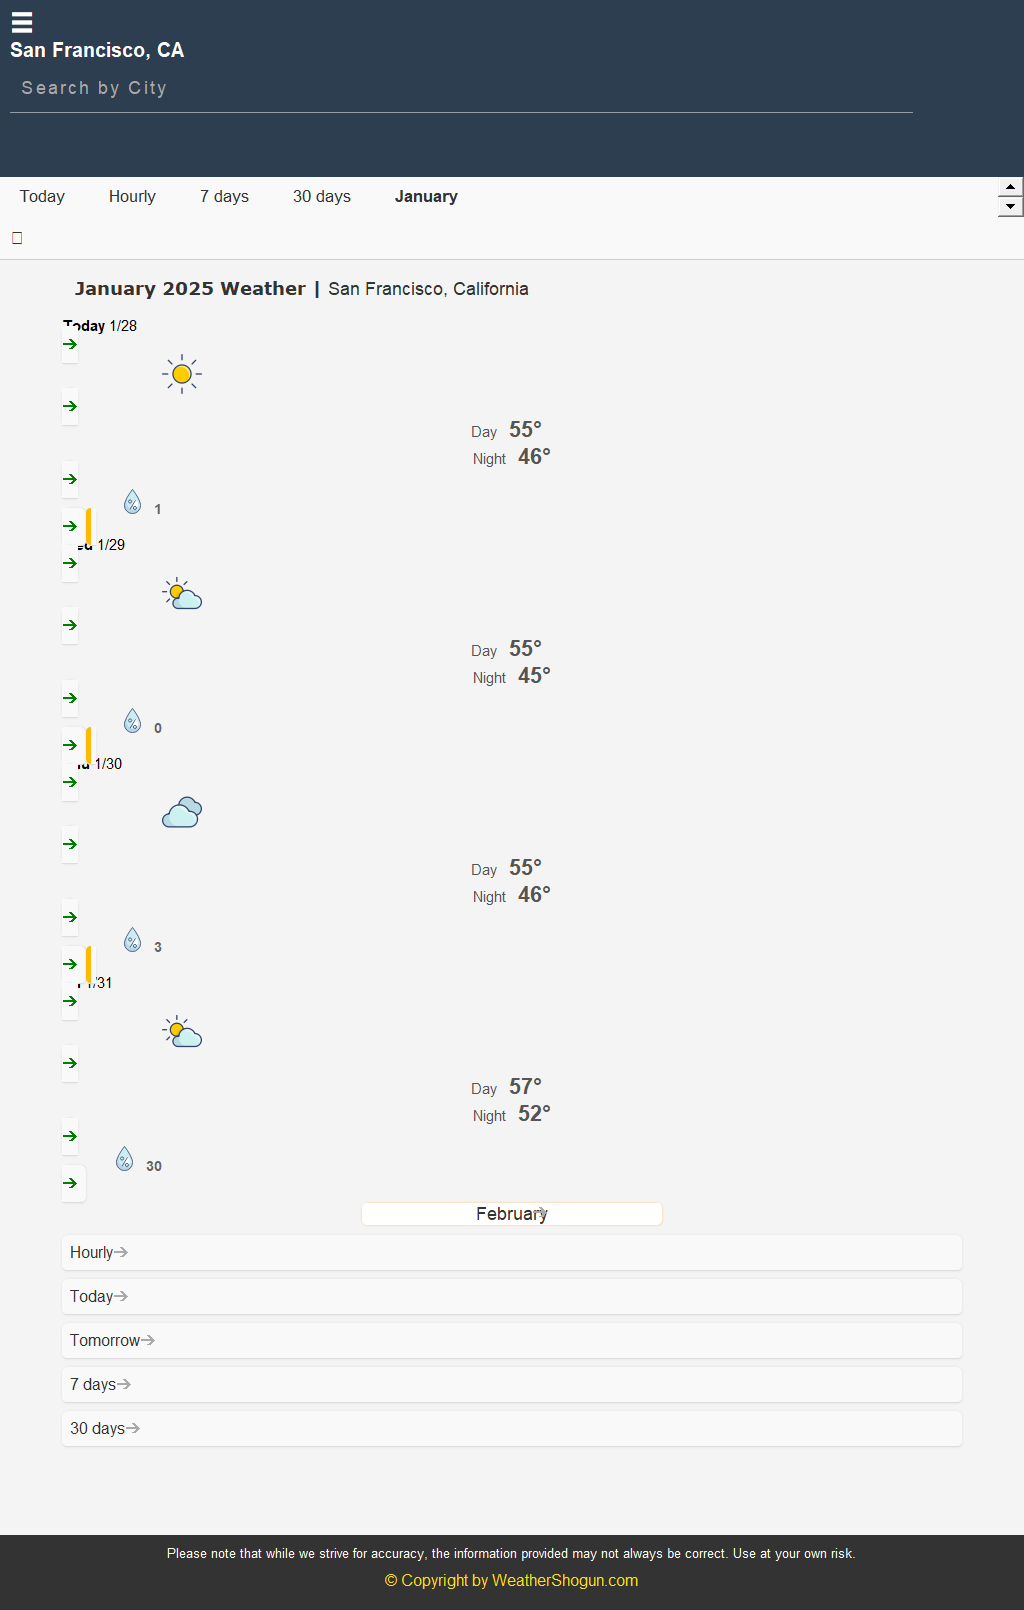

In [25]:
from IPython.display import display, HTML, Image
import imgkit

# URL to fetch
url = "https://weathershogun.com/weather/usa/ca/san-francisco/480/january"

# Display the link
display(HTML(f'<a href="{url}">{url}</a>'))

# Display the content in an iframe
display(HTML(f'''
    <iframe src="{url}" width="400" height="300" style="border: 1px solid black;"></iframe>
'''))

# Convert the webpage to an image
imgkit.from_url(url, 'weather_report.png')

# Display the PNG image
display(Image(filename="weather_report.png"))

## Conclusion
This notebook demonstrated how to utilize the langchain library and its tools to perform searches and extract useful information. By leveraging the TavilySearchResults tool, we were able to fetch and process search results effectively. Additionally, web scraping techniques were used to extract and present data in a structured format. This approach can be extended to various use cases requiring automated information retrieval and processing.